# find enrichment of metabolism terms for mouse ST data
differential genes from tumor and LN data

In [60]:
import pandas as pd
import joblib
from scipy.stats import hypergeom
import scanpy as sc
import matplotlib.pyplot as plt

In [61]:
out_file_path = './'
gene_signature_dir = out_file_path + 'gene_signatures/'
de_genes_out = './data/mouseST_de/'

# read in data

metabolism signatures

In [62]:
# met_filename = gene_signature_dir + 'metabolism_terms_msigdb.pickle'
# met_terms = joblib.load(met_filename)

In [63]:
mouse_filename = gene_signature_dir + 'metabolism_terms_mouse.pickle'
mouse_terms = joblib.load(mouse_filename)

In [64]:
for k,v in mouse_terms.items():
    print(f'{k}: {len(v)}')

KEGG_MM_GLYCOLYSIS_GLUCONEOGENESIS: 66
KEGG_MM_CITRATE_CYCLE: 33
KEGG_MM_PENTOSE_PHOSPHATE_PATHWAY: 30
KEGG_MM_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS: 34
KEGG_MM_FRUCTOSE_AND_MANNOSE_METABOLISM: 40
KEGG_MM_GALACTOSE_METABOLISM: 31
KEGG_MM_ASCORBATE_AND_ALDARATE_METABOLISM: 27
KEGG_MM_FATTY_ACID_BIOSYNTHESIS: 6
KEGG_MM_FATTY_ACID_METABOLISM: 48
KEGG_MM_SYNTHESIS_AND_DEGRADATION_OF_KETONE_BODIES: 11
KEGG_MM_STEROID_BIOSYNTHESIS: 17
KEGG_MM_PRIMARY_BILE_ACID_BIOSYNTHESIS: 16
KEGG_MM_STEROID_HORMONE_BIOSYNTHESIS: 58
KEGG_MM_OXIDATIVE_PHOSPHORYLATION: 142
KEGG_MM_PURINE_METABOLISM: 170
KEGG_MM_CAFFEINE_METABOLISM: 9
KEGG_MM_PYRIMIDINE_METABOLISM: 100
KEGG_MM_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM: 35
KEGG_MM_GLYCINE_SERINE_AND_THREONINE_METABOLISM: 39
KEGG_MM_CYSTEINE_AND_METHIONINE_METABOLISM: 39
KEGG_MM_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION: 53
KEGG_MM_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS: 2
KEGG_MM_LYSINE_BIOSYNTHESIS: 5
KEGG_MM_LYSINE_DEGRADATION: 48
KEGG_MM_ARGININE_AND

mouse ST genes

In [65]:
de_gene_dir = '../../../mouse_st/spatial/analysis_out/'

In [30]:
# tumor_adata = sc.read(de_gene_dir + 'T_2_diffexp.h5ad')
# tumor_adata

AnnData object with n_obs × n_vars = 9800 × 17575
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'experiment', 'condition', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'louvain'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'condition_colors', 'louvain', 'louvain_colors', 'louvain_logFC', 'neighbors', 'pca', 'sample_colors', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'raw', 'scT', 'scT_data', 'sc_norm'
    obsp: 'connectivities', 'distances'

In [31]:
# ln_adata = sc.read(de_gene_dir + 'LN_2_diffexp.h5ad')
# ln_adata

AnnData object with n_obs × n_vars = 3866 × 15528
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'batch', 'experiment', 'condition', 'ln_name', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'louvain'
    var: 'n_cells', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'condition_colors', 'ln_name_colors', 'louvain', 'louvain_colors', 'louvain_logFC', 'neighbors', 'pca', 'sample_colors', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'raw', 'scT', 'scT_data', 'sc_norm'
    obsp: 'connectivities', 'distances'

In [33]:
# tumor_genes_out_fname = de_genes_out + 'mouseST_tumor_genes_all.pickle'
# joblib.dump(tumor_adata.uns['louvain_logFC'], tumor_genes_out_fname)

['./data/mouseST_de/mouseST_tumor_genes_all.pickle']

In [34]:
# ln_genes_out_fname = de_genes_out + 'mouseST_ln_genes_all.pickle'
# joblib.dump(ln_adata.uns['louvain_logFC'], ln_genes_out_fname)

['./data/mouseST_de/mouseST_ln_genes_all.pickle']

# find enrichment

In [66]:
from utils import hypergeometric_test, adjust_p_value_fdr

In [67]:
logfc_thresh = 0
p_thresh = 0.05

## for tumors

## DE genes for clusters

In [35]:
tumor_genes_out_fname = de_genes_out + 'mouseST_tumor_genes_all.pickle'
tumor_genes = joblib.load(tumor_genes_out_fname)

In [72]:
min(abs(tumor_genes['0']['log2FC']))

0.5000512863842314

In [70]:
tumor_genes['0']

,log2FC,x_mean,y_mean,pval,padj
Gstp1,1.323228,0.495777,0.140030,0.000000e+00,0.000000e+00
Oas1a,1.181923,0.495072,0.164088,1.221223e-251,2.358182e-248
AC168977.2,1.150747,0.199935,0.036859,2.594069e-190,5.009147e-187
Oas1g,1.057074,0.268770,0.078906,2.559714e-156,4.942807e-153
Dynlt1f,1.049963,0.371341,0.129314,3.312596e-177,6.396622e-174
...,...,...,...,...,...
Gas6,-1.299443,0.039017,0.237460,6.861794e-79,1.325012e-75
mt-Atp8,-1.328963,0.023023,0.204190,5.346239e-92,1.032359e-88
Acta1,-1.378146,0.003051,0.162714,2.303730e-59,4.448502e-56
Rarres2,-1.438053,0.132602,0.524741,7.846640e-169,1.515186e-165


In [39]:
M = len(tumor_adata.var)
hypergeom_res_tumor = {k: {} for k in tumor_genes.keys()}
for st_key in tumor_genes.keys():
    df = tumor_genes[st_key]
    df = df[df['log2FC'] > logfc_thresh]
    df = df[df['padj'] < p_thresh]
    df['genes'] = df.index.str.upper()
    df_genes = set(df['genes'])
    N = len(df) # length of DE genes
    for k,v in mouse_terms.items():
        n = len(v) # number of met genes
        x = len(df_genes.intersection(v))
        pct_overlap = x/(N+n)
        
        if pct_overlap > 0:
            p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                        n_genes_picked=N, n_overlap=x)
            hypergeom_res_tumor[st_key][k] = p_val
        else:
            hypergeom_res_tumor[st_key][k] = 1

In [40]:
hypergeom_df_tumor = pd.DataFrame.from_dict(hypergeom_res_tumor)
hypergeom_df_tumor['term'] = hypergeom_df_tumor.index
hypergeom_df_tumor = hypergeom_df_tumor.melt('term')
hypergeom_df_tumor['p'] = hypergeom_df_tumor['value']
hypergeom_df_tumor['padj'] = adjust_p_value_fdr(hypergeom_df_tumor['p'])
hypergeom_df_tumor

,term,variable,value,p,padj
0,KEGG_MM_GLYCOLYSIS_GLUCONEOGENESIS,0,0.894497,0.894497,1.0
1,KEGG_MM_CITRATE_CYCLE,0,0.400867,0.400867,1.0
2,KEGG_MM_PENTOSE_PHOSPHATE_PATHWAY,0,0.953479,0.953479,1.0
3,KEGG_MM_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS,0,1.000000,1.000000,1.0
4,KEGG_MM_FRUCTOSE_AND_MANNOSE_METABOLISM,0,0.911205,0.911205,1.0
...,...,...,...,...,...
1213,KEGG_MM_MTOR_SIGNALING_PATHWAY,9,1.000000,1.000000,1.0
1214,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,9,1.000000,1.000000,1.0
1215,KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY,9,1.000000,1.000000,1.0
1216,KEGG_MM_INSULIN_SIGNALING_PATHWAY,9,1.000000,1.000000,1.0


In [42]:
hypergeom_df_tumor[hypergeom_df_tumor['padj'] < 0.05].value_counts('variable')

variable
5     13
2      9
7      9
6      8
0      6
4      4
1      3
13     2
10     1
11     1
3      1
dtype: int64

In [41]:
hypergeom_df_tumor[hypergeom_df_tumor['padj'] < 0.05]

,term,variable,value,p,padj
14,KEGG_MM_PURINE_METABOLISM,0,9.260279e-04,9.260279e-04,1.165188e-03
16,KEGG_MM_PYRIMIDINE_METABOLISM,0,5.909647e-10,5.909647e-10,1.392253e-09
19,KEGG_MM_CYSTEINE_AND_METHIONINE_METABOLISM,0,1.089010e-02,1.089010e-02,1.522863e-02
36,KEGG_MM_GLUTATHIONE_METABOLISM,0,5.996946e-04,5.996946e-04,8.633901e-04
67,KEGG_MM_PANTOTHENATE_AND_COA_BIOSYNTHESIS,0,2.826548e-03,2.826548e-03,6.305375e-03
80,KEGG_MM_RNA_DEGRADATION,0,3.079878e-06,3.079878e-06,4.821711e-06
103,KEGG_MM_PYRIMIDINE_METABOLISM,1,2.714020e-03,2.714020e-03,5.491158e-03
120,KEGG_MM_CYANOAMINO_ACID_METABOLISM,1,1.685408e-02,1.685408e-02,2.018512e-02
171,KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY,1,1.018329e-03,1.018329e-03,2.465854e-03
257,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,10,1.477930e-03,1.477930e-03,1.232958e-02


In [105]:
hypergeom_df_tumor[hypergeom_df_tumor['padj'] < 0.05].to_csv('./hypergeom_results_mouseST_tumor_louvain.csv')

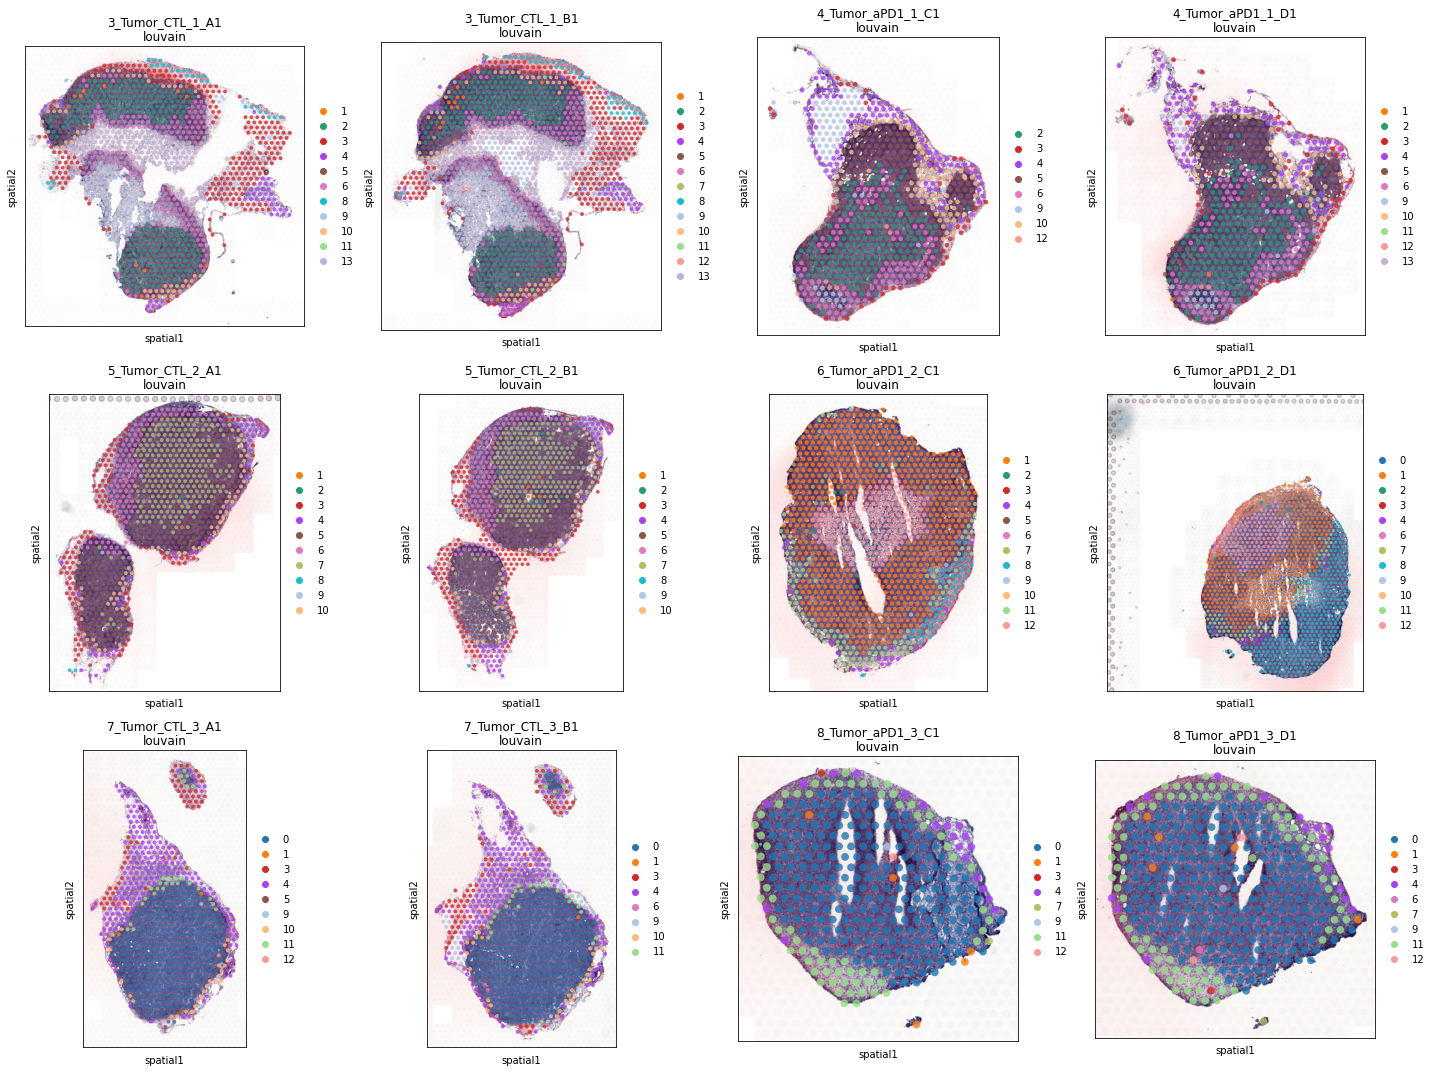

In [59]:
nrow = 3
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize = (5*ncol, 5*nrow))
r = c = 0
for sample in tumor_adata.obs['sample'].values.categories:
    sc.pl.spatial(
        tumor_adata[tumor_adata.obs['sample'] == sample],
        img_key="hires",
        library_id = sample,
        alpha=0.8,
        color=["louvain"],
        title=[sample + '\nlouvain'], show = False, ax = axs[r,c])
    if c == ncol-1:
        r+=1
        c=0
    else:
        c+=1
plt.tight_layout()

## DE genes for condition

In [82]:
tumor_tmt_genes = {}
for tmt in ['aPD1', 'CTL']:
    tumor_tmt_genes[tmt] = pd.read_csv(de_genes_out + 'tumor_%s.csv'%tmt, index_col = 0)

In [83]:
min(abs(tumor_tmt_genes['aPD1']['log2FC']))

0.5023554563522339

In [84]:
tumor_tmt_genes['aPD1']

,log2FC,x_mean,y_mean,pval,padj,genes
GZMF,1.605930,1.969072,0.506612,2.024759e-174,3.057386e-172,GZMF
DES,1.479649,1.054663,0.244180,3.123493e-58,4.716474e-56,DES
ACTA1,1.344683,3.561975,1.275843,6.118160e-115,9.238422e-113,ACTA1
CRYAB,1.213763,0.857109,0.250698,2.798872e-32,4.226297e-30,CRYAB
SLN,1.157692,0.346919,0.040231,4.080418e-37,6.161431e-35,SLN
MUSTN1,1.156697,0.471110,0.096107,6.340475e-46,9.574117e-44,MUSTN1
GZMG,1.149349,1.016303,0.343453,2.204289e-80,3.328477e-78,GZMG
GZMD,1.137579,1.631263,0.627491,1.558507e-105,2.353346e-103,GZMD
CCL21A,1.068608,0.231599,0.001118,6.227129e-41,9.402965e-39,CCL21A
MYLPF,0.973298,1.050348,0.432483,9.644191e-59,1.456273e-56,MYLPF


In [85]:
M = len(tumor_adata.var)
hypergeom_res_tumor_tmt = {k: {} for k in tumor_tmt_genes.keys()}
for st_key in tumor_tmt_genes.keys():
    df = tumor_tmt_genes[st_key]
    df = df[df['log2FC'] > logfc_thresh]
    df = df[df['padj'] < p_thresh]
    df['genes'] = df.index.str.upper()
    df_genes = set(df['genes'])
    N = len(df) # length of DE genes
    for k,v in mouse_terms.items():
        n = len(v) # number of met genes
        x = len(df_genes.intersection(v))
        pct_overlap = x/(N+n)
        
        if pct_overlap > 0:
            p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                        n_genes_picked=N, n_overlap=x)
            hypergeom_res_tumor_tmt[st_key][k] = p_val
        else:
            hypergeom_res_tumor_tmt[st_key][k] = 1

In [86]:
hypergeom_df_tumor_tmt = pd.DataFrame.from_dict(hypergeom_res_tumor_tmt)
hypergeom_df_tumor_tmt['term'] = hypergeom_df_tumor_tmt.index
hypergeom_df_tumor_tmt = hypergeom_df_tumor_tmt.melt('term')
hypergeom_df_tumor_tmt['p'] = hypergeom_df_tumor_tmt['value']
hypergeom_df_tumor_tmt['padj'] = adjust_p_value_fdr(hypergeom_df_tumor_tmt['p'])
hypergeom_df_tumor_tmt

,term,variable,value,p,padj
0,KEGG_MM_GLYCOLYSIS_GLUCONEOGENESIS,aPD1,1.000000,1.000000,1.000000
1,KEGG_MM_CITRATE_CYCLE,aPD1,1.000000,1.000000,1.000000
2,KEGG_MM_PENTOSE_PHOSPHATE_PATHWAY,aPD1,1.000000,1.000000,1.000000
3,KEGG_MM_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS,aPD1,1.000000,1.000000,1.000000
4,KEGG_MM_FRUCTOSE_AND_MANNOSE_METABOLISM,aPD1,1.000000,1.000000,1.000000
...,...,...,...,...,...
169,KEGG_MM_MTOR_SIGNALING_PATHWAY,CTL,1.000000,1.000000,1.000000
170,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,CTL,0.173086,0.173086,0.485756
171,KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY,CTL,1.000000,1.000000,1.000000
172,KEGG_MM_INSULIN_SIGNALING_PATHWAY,CTL,1.000000,1.000000,1.000000


In [89]:
hypergeom_df_tumor_tmt[hypergeom_df_tumor_tmt['p'] < 1]

,term,variable,value,p,padj
24,KEGG_MM_ARGININE_AND_PROLINE_METABOLISM,aPD1,0.144559,0.144559,0.201226
78,KEGG_MM_METABOLIC_PATHWAYS,aPD1,0.969423,0.969423,1.000000
83,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,aPD1,0.624993,0.624993,0.749992
123,KEGG_MM_GLUTATHIONE_METABOLISM,CTL,0.199872,0.199872,1.000000
139,KEGG_MM_ARACHIDONIC_ACID_METABOLISM,CTL,0.059676,0.059676,0.140320
163,KEGG_MM_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROM...,CTL,0.322717,0.322717,1.000000
164,KEGG_MM_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS,CTL,0.096311,0.096311,0.299251
165,KEGG_MM_METABOLIC_PATHWAYS,CTL,0.994270,0.994270,1.000000
168,KEGG_MM_HIF-1_SIGNALING_PATHWAY,CTL,0.368017,0.368017,1.000000
170,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,CTL,0.173086,0.173086,0.485756


In [87]:
hypergeom_df_tumor_tmt[hypergeom_df_tumor_tmt['padj'] < 0.05].value_counts('variable')

Series([], dtype: int64)

In [88]:
hypergeom_df_tumor_tmt[hypergeom_df_tumor_tmt['padj'] < 0.05]

,term,variable,value,p,padj


In [104]:
hypergeom_df_tumor_tmt[hypergeom_df_tumor_tmt['padj'] < 0.05].to_csv('./hypergeom_results_mouseST_tumor_tmt.csv')

# for LN

## for louvain clusters

In [44]:
ln_genes_out_fname = de_genes_out + 'mouseST_ln_genes_all.pickle'
ln_genes = joblib.load(ln_genes_out_fname)

In [45]:
ln_genes['0']

,log2FC,x_mean,y_mean,pval,padj
Cacnb3,1.663327,0.592352,0.132824,8.860793e-276,1.009244e-272
Ccl22,1.589628,0.742426,0.193799,2.128632e-275,2.424512e-272
Als2cl,1.467453,0.424635,0.103004,7.667142e-195,8.732874e-192
Dapl1,1.404591,0.797590,0.251993,1.281437e-281,1.459557e-278
Apol7c,1.368535,0.685721,0.217049,6.649665e-218,7.573968e-215
...,...,...,...,...,...
Cxcl13,-1.706464,0.149205,0.666196,9.881878e-151,1.125546e-147
Cldn5,-1.716502,0.036194,0.300003,2.430361e-93,2.768182e-90
Postn,-1.811759,0.030910,0.307333,2.778446e-105,3.164650e-102
Lyve1,-1.815044,0.023193,0.281060,8.844756e-87,1.007418e-83


In [47]:
M = len(ln_adata.var)
hypergeom_res_ln = {k: {} for k in ln_genes.keys()}
for st_key in ln_genes.keys():
    df = ln_genes[st_key]
    df = df[df['log2FC'] > logfc_thresh]
    df = df[df['padj'] < p_thresh]
    df['genes'] = df.index.str.upper()
    df_genes = set(df['genes'])
    N = len(df) # length of DE genes
    for k,v in mouse_terms.items():
        n = len(v) # number of met genes
        x = len(df_genes.intersection(v))
        pct_overlap = x/(N+n)
        
        if pct_overlap > 0:
            p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                        n_genes_picked=N, n_overlap=x)
            hypergeom_res_ln[st_key][k] = p_val
        else:
            hypergeom_res_ln[st_key][k] = 1

In [48]:
hypergeom_df_ln = pd.DataFrame.from_dict(hypergeom_res_ln)
hypergeom_df_ln['term'] = hypergeom_df_ln.index
hypergeom_df_ln = hypergeom_df_ln.melt('term')
hypergeom_df_ln['p'] = hypergeom_df_ln['value']
hypergeom_df_ln['padj'] = adjust_p_value_fdr(hypergeom_df_ln['p'])
hypergeom_df_ln

,term,variable,value,p,padj
0,KEGG_MM_GLYCOLYSIS_GLUCONEOGENESIS,0,0.136179,0.136179,0.166166
1,KEGG_MM_CITRATE_CYCLE,0,1.000000,1.000000,1.000000
2,KEGG_MM_PENTOSE_PHOSPHATE_PATHWAY,0,1.000000,1.000000,1.000000
3,KEGG_MM_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS,0,1.000000,1.000000,1.000000
4,KEGG_MM_FRUCTOSE_AND_MANNOSE_METABOLISM,0,0.543416,0.543416,1.000000
...,...,...,...,...,...
865,KEGG_MM_MTOR_SIGNALING_PATHWAY,9,0.268641,0.268641,0.398835
866,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,9,0.030658,0.030658,0.045594
867,KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY,9,1.000000,1.000000,1.000000
868,KEGG_MM_INSULIN_SIGNALING_PATHWAY,9,0.000014,0.000014,0.000022


In [49]:
hypergeom_df_ln[hypergeom_df_ln['padj'] < 0.05].value_counts('variable')

variable
9    15
3     6
4     3
5     3
8     3
0     1
6     1
dtype: int64

In [50]:
hypergeom_df_ln[hypergeom_df_ln['padj'] < 0.05]

,term,variable,value,p,padj
81,KEGG_MM_HIF-1_SIGNALING_PATHWAY,0,2.270949e-02,2.270949e-02,2.340908e-02
300,KEGG_MM_OTHER_GLYCAN_DEGRADATION,3,5.859375e-05,5.859375e-05,1.583123e-04
303,KEGG_MM_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METAB...,3,3.699268e-04,3.699268e-04,6.273613e-04
305,KEGG_MM_GLYCOSAMINOGLYCAN_DEGRADATION,3,5.870917e-07,5.870917e-07,1.538463e-06
316,KEGG_MM_SPHINGOLIPID_METABOLISM,3,9.840831e-06,9.840831e-06,2.446149e-05
319,KEGG_MM_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO...,3,1.471082e-03,1.471082e-03,1.207397e-02
344,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,3,2.797825e-03,2.797825e-03,7.751935e-03
392,KEGG_MM_GLYCOSAMINOGLYCAN_DEGRADATION,4,1.341621e-04,1.341621e-04,2.520972e-04
398,KEGG_MM_GLYCEROPHOSPHOLIPID_METABOLISM,4,1.091044e-02,1.091044e-02,1.357951e-02
399,KEGG_MM_ETHER_LIPID_METABOLISM,4,1.128262e-03,1.128262e-03,2.277467e-03


In [51]:
hypergeom_df_ln[hypergeom_df_ln['padj'] < 0.05].to_csv('./hypergeom_results_mouseST_ln.csv')

In [52]:
len(ln_adata.obs['sample'].unique())

4

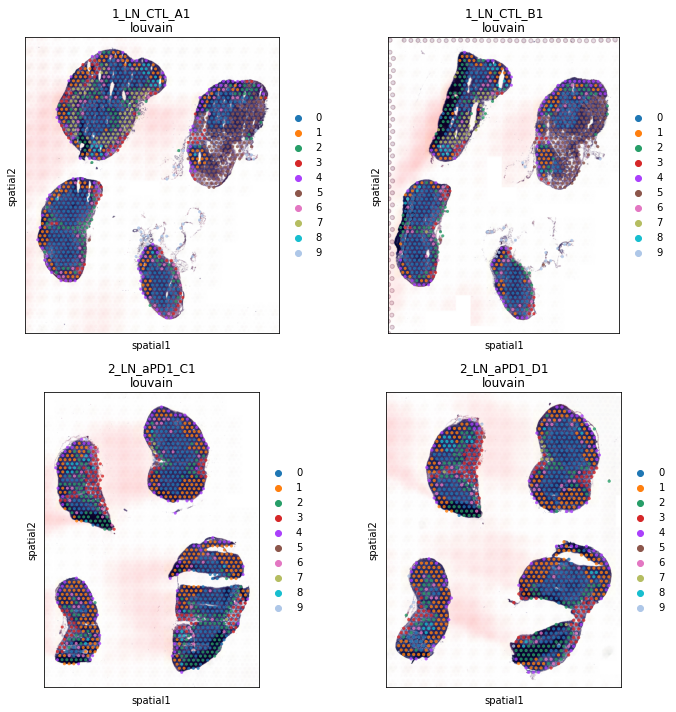

In [57]:
nrow = 2
ncol = 2
fig, axs = plt.subplots(nrow, ncol, figsize = (5*ncol, 5*nrow))
r = c = 0
for sample in ln_adata.obs['sample'].values.categories:
    sc.pl.spatial(
        ln_adata[ln_adata.obs['sample'] == sample],
        img_key="hires",
        library_id = sample,
        alpha=0.8,
        color=["louvain"],
        title=[sample + '\nlouvain'], show = False, ax = axs[r,c])
    if c == ncol-1:
        r+=1
        c=0
    else:
        c+=1
plt.tight_layout()

## for condition

In [94]:
ln_tmt_genes = {}
for tmt in ['aPD1', 'CTL']:
    ln_tmt_genes[tmt] = pd.read_csv(de_genes_out + 'ln_%s.csv'%tmt, index_col = 0, sep = '\t')

In [96]:
min(abs(ln_tmt_genes['aPD1']['log2FC']))

0.5061125159263611

In [97]:
ln_tmt_genes['aPD1']

,log2FC,x_mean,y_mean,pval,padj
CR2,0.784258,1.469816,0.784913,3.183172e-31,7.957929e-29
GM19951,0.690300,0.709711,0.377676,4.641981e-29,1.160495e-26
CD83,0.667526,2.538583,1.537717,3.587128e-37,8.967820e-35
MS4A1,0.614550,4.037795,2.580530,2.560513e-29,6.401283e-27
FCRL1,0.597867,1.585827,0.992355,6.428513e-26,1.607128e-23
PHTF2,0.568684,0.538583,0.309888,3.349752e-23,8.374379e-21
ULK4,0.558754,0.284514,0.140673,5.493813e-15,1.373453e-12
TNFRSF13C,0.552334,1.967979,1.290010,1.896500e-23,4.741250e-21
CXCR5,0.551265,0.911811,0.570336,2.601269e-26,6.503173e-24
LY6D,0.550440,9.812598,6.648318,9.545028e-26,2.386257e-23


In [98]:
M = len(ln_adata.var)
hypergeom_res_ln_tmt = {k: {} for k in ln_tmt_genes.keys()}
for st_key in ln_tmt_genes.keys():
    df = ln_tmt_genes[st_key]
    df = df[df['log2FC'] > logfc_thresh]
    df = df[df['padj'] < p_thresh]
    df['genes'] = df.index.str.upper()
    df_genes = set(df['genes'])
    N = len(df) # length of DE genes
    for k,v in mouse_terms.items():
        n = len(v) # number of met genes
        x = len(df_genes.intersection(v))
        pct_overlap = x/(N+n)
        
        if pct_overlap > 0:
            p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                        n_genes_picked=N, n_overlap=x)
            hypergeom_res_ln_tmt[st_key][k] = p_val
        else:
            hypergeom_res_ln_tmt[st_key][k] = 1

In [99]:
hypergeom_df_ln_tmt = pd.DataFrame.from_dict(hypergeom_res_ln_tmt)
hypergeom_df_ln_tmt['term'] = hypergeom_df_ln_tmt.index
hypergeom_df_ln_tmt = hypergeom_df_ln_tmt.melt('term')
hypergeom_df_ln_tmt['p'] = hypergeom_df_ln_tmt['value']
hypergeom_df_ln_tmt['padj'] = adjust_p_value_fdr(hypergeom_df_ln_tmt['p'])
hypergeom_df_ln_tmt

,term,variable,value,p,padj
0,KEGG_MM_GLYCOLYSIS_GLUCONEOGENESIS,aPD1,1.000000e+00,1.000000e+00,1.000000e+00
1,KEGG_MM_CITRATE_CYCLE,aPD1,1.000000e+00,1.000000e+00,1.000000e+00
2,KEGG_MM_PENTOSE_PHOSPHATE_PATHWAY,aPD1,1.000000e+00,1.000000e+00,1.000000e+00
3,KEGG_MM_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS,aPD1,1.000000e+00,1.000000e+00,1.000000e+00
4,KEGG_MM_FRUCTOSE_AND_MANNOSE_METABOLISM,aPD1,1.000000e+00,1.000000e+00,1.000000e+00
...,...,...,...,...,...
169,KEGG_MM_MTOR_SIGNALING_PATHWAY,CTL,4.528436e-01,4.528436e-01,1.000000e+00
170,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,CTL,3.830295e-12,3.830295e-12,1.092576e-11
171,KEGG_MM_NOD-LIKE_RECEPTOR_SIGNALING_PATHWAY,CTL,1.111558e-01,1.111558e-01,3.119534e-01
172,KEGG_MM_INSULIN_SIGNALING_PATHWAY,CTL,1.000000e+00,1.000000e+00,1.000000e+00


In [100]:
hypergeom_df_ln_tmt[hypergeom_df_ln_tmt['p'] < 1]

,term,variable,value,p,padj
83,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,aPD1,3.557554e-01,3.557554e-01,4.298711e-01
105,KEGG_MM_GLYCINE_SERINE_AND_THREONINE_METABOLISM,CTL,3.154794e-01,3.154794e-01,1.000000e+00
113,KEGG_MM_TYROSINE_METABOLISM,CTL,3.479932e-01,3.479932e-01,1.000000e+00
114,KEGG_MM_PHENYLALANINE_METABOLISM,CTL,2.079572e-01,2.079572e-01,1.000000e+00
117,KEGG_MM_BETA-ALANINE_METABOLISM,CTL,2.600756e-01,2.600756e-01,1.000000e+00
123,KEGG_MM_GLUTATHIONE_METABOLISM,CTL,1.855143e-04,1.855143e-04,2.151966e-03
135,KEGG_MM_GLYCEROLIPID_METABOLISM,CTL,4.199017e-01,4.199017e-01,1.000000e+00
139,KEGG_MM_ARACHIDONIC_ACID_METABOLISM,CTL,2.444609e-01,2.444609e-01,5.748135e-01
159,KEGG_MM_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM,CTL,3.416155e-01,3.416155e-01,1.000000e+00
163,KEGG_MM_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROM...,CTL,6.597939e-02,6.597939e-02,2.166116e-01


In [101]:
hypergeom_df_ln_tmt[hypergeom_df_ln_tmt['padj'] < 0.05].value_counts('variable')

variable
CTL    2
dtype: int64

In [102]:
hypergeom_df_ln_tmt[hypergeom_df_ln_tmt['padj'] < 0.05]

,term,variable,value,p,padj
123,KEGG_MM_GLUTATHIONE_METABOLISM,CTL,1.855143e-04,1.855143e-04,2.151966e-03
170,KEGG_MM_PI3K-AKT_SIGNALING_PATHWAY,CTL,3.830295e-12,3.830295e-12,1.092576e-11


In [103]:
hypergeom_df_ln_tmt[hypergeom_df_ln_tmt['padj'] < 0.05].to_csv('./hypergeom_results_mouseST_ln_tmt.csv')